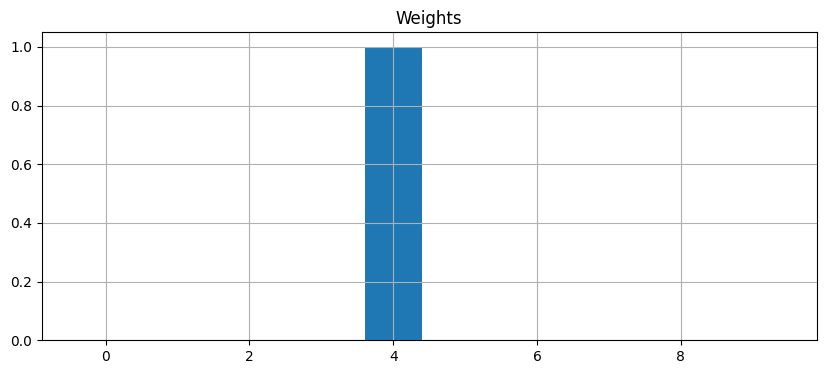

In [3]:
import torch
import torch.nn.functional as F


def make_spike_weights(p, num_slices, alpha=1.0, gamma=10.0):
    """
    Create strictly positive, differentiable, and sharper logits for each possible slice
    based on a continuous parameter.
    
    Args:
        p (Tensor): A scalar tensor in [0, 1] representing the normalized starting position.
        num_slices (int): The number of possible slices.
        alpha (float): Steepness factor.
        gamma (float): Exponent factor to sharpen the spike (gamma > 1).
    
    Returns:
        Tensor: Logits of shape (num_slices,) that are >0 and have a sharper spike at the index closest to p*(num_slices-1).
    """
    # Scale the normalized position to the index range [0, num_slices - 1]
    p_scaled = p * (num_slices - 1)
    # Create a tensor of candidate slice indices.
    indices = torch.arange(num_slices, device=p.device, dtype=p.dtype)
    # Compute logits using a powered (gamma exponent) version of the inverted absolute difference.
    # This makes the spike sharper as gamma increases.
    logits = alpha * (((num_slices - 1) - torch.abs(indices - p_scaled)) ** gamma)
    return logits

w = make_spike_weights(torch.tensor(0.48), 10)
w = F.softmax(w, dim=0)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.bar(range(len(w)), w.numpy())
plt.title("Weights")
plt.grid(True)
plt.show()